In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 📁 Load Dataset
data = pd.read_csv("/content/drive/MyDrive/Machine Learning Project/WineQT.csv")  # Save your given data as wine_quality.csv

# 🎯 Target column: quality
# Convert quality into binary (1 = good, 0 = bad)
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 6 else 0)

# 🧩 Split features and target
X = data.drop(['quality', 'Id'], axis=1)
y = data['quality']

# 🔀 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ⚖️ Feature Scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🌲 1️⃣ Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# ⚙️ 2️⃣ Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)

# 📊 Model Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📘 {model_name} Evaluation:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# 🧾 Evaluate Both Models
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, svm_pred, "SVM")

# 🩵 ROC-AUC Scores
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
svm_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test_scaled)[:,1])
print("\nROC-AUC (Random Forest):", rf_auc)
print("ROC-AUC (SVM):", svm_auc)


📘 Random Forest Evaluation:
Accuracy: 0.7725947521865889
Precision: 0.8228571428571428
Recall: 0.7539267015706806
F1-score: 0.7868852459016393
Confusion Matrix:
 [[121  31]
 [ 47 144]]

📘 SVM Evaluation:
Accuracy: 0.7638483965014577
Precision: 0.7989130434782609
Recall: 0.7696335078534031
F1-score: 0.784
Confusion Matrix:
 [[115  37]
 [ 44 147]]

ROC-AUC (Random Forest): 0.8454464039680352
ROC-AUC (SVM): 0.8492008817856158


# Chatgpt

In [ ]:
# Import all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve
)


🧩 Step 1: Load and Prepare Data

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Project/WineQT.csv")

# Show first few rows
print(df.head())

# Define features (X) and target (y)
# Drop 'Id' (not useful) and 'quality' (target variable)
X = df.drop(['quality', 'Id'], axis=1)

# Convert quality into binary classes: 1 = Good (>=6), 0 = Bad (<6)
y = (df['quality'] >= 6).astype(int)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

🌲 Step 2: Train Random Forest Classifier

In [ ]:
# Create and train Random Forest model
rf = RandomForestClassifier(
    n_estimators=200,      # Number of trees
    max_features='sqrt',   # Use sqrt(number of features) at each split
    random_state=42,
    n_jobs=-1,             # Use all CPU cores
    oob_score=True         # Use Out-Of-Bag samples for validation
)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Evaluate model
print("🌲 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("OOB Score:", rf.oob_score_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


🌲 Random Forest Results:
Accuracy: 0.8122270742358079
OOB Score: 0.7888402625820569

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79       105
           1       0.80      0.86      0.83       124

    accuracy                           0.81       229
   macro avg       0.81      0.81      0.81       229
weighted avg       0.81      0.81      0.81       229


Confusion Matrix:
 [[ 79  26]
 [ 17 107]]


💻 Step 3: Train SVM Classifier

In [ ]:
# Scale features for SVM (important!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train SVM model
svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_svm = svm.predict(X_test_scaled)

# Evaluate model
print("\n💻 SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))



💻 SVM Results:
Accuracy: 0.7860262008733624

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       105
           1       0.80      0.81      0.80       124

    accuracy                           0.79       229
   macro avg       0.78      0.78      0.78       229
weighted avg       0.79      0.79      0.79       229


Confusion Matrix:
 [[ 79  26]
 [ 23 101]]


## 🎨 Step 4: Visualizations

1️⃣ Confusion Matrix (Random Forest & SVM)

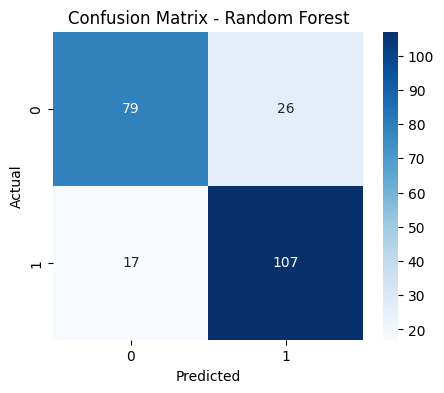

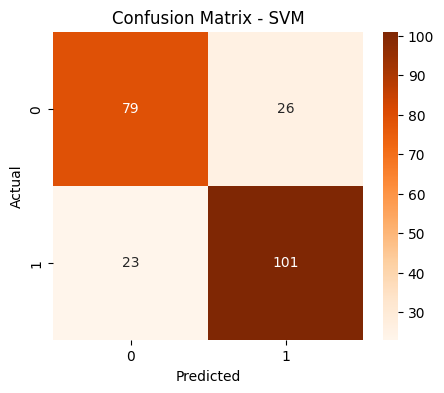

In [ ]:
# Plot confusion matrix for Random Forest
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot confusion matrix for SVM
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


2️⃣ Feature Importance (Random Forest)

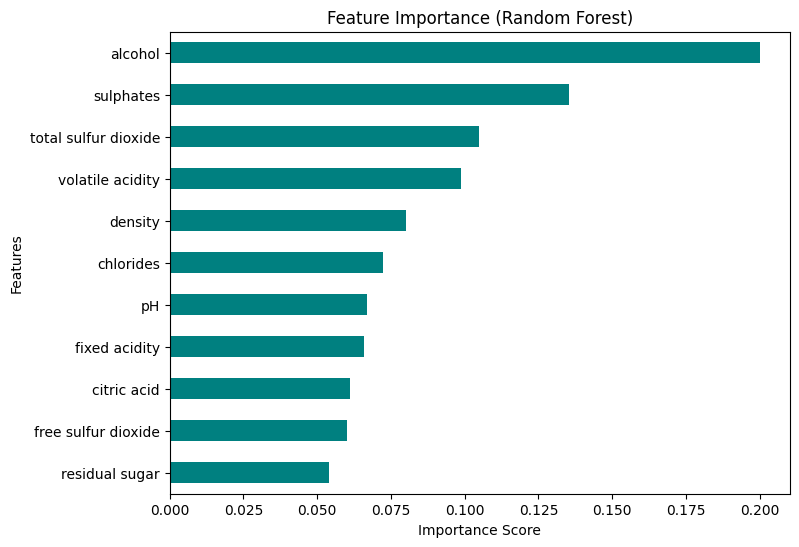

In [ ]:
# Extract feature importance scores
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort and plot
plt.figure(figsize=(8,6))
feat_importances.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


3️⃣ ROC Curve (Receiver Operating Characteristic)

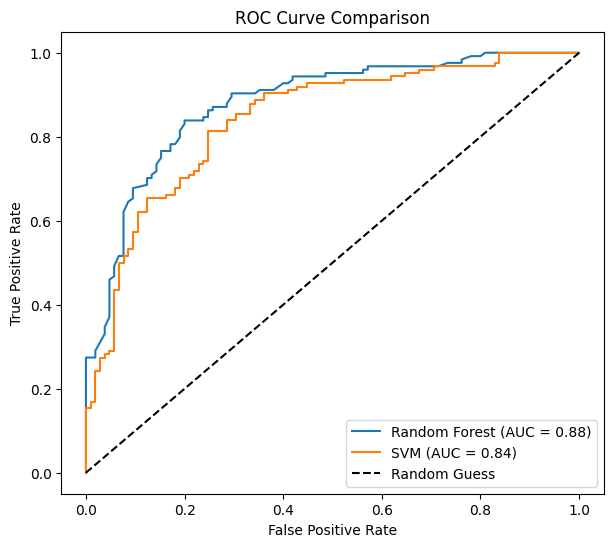

In [ ]:
# Calculate predicted probabilities for ROC
y_prob_rf = rf.predict_proba(X_test)[:,1]
y_prob_svm = svm.predict_proba(X_test_scaled)[:,1]

# Compute False Positive Rate (fpr) and True Positive Rate (tpr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

# Compute AUC (Area Under Curve)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot both ROC curves
plt.figure(figsize=(7,6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


4️⃣ Precision–Recall Curve

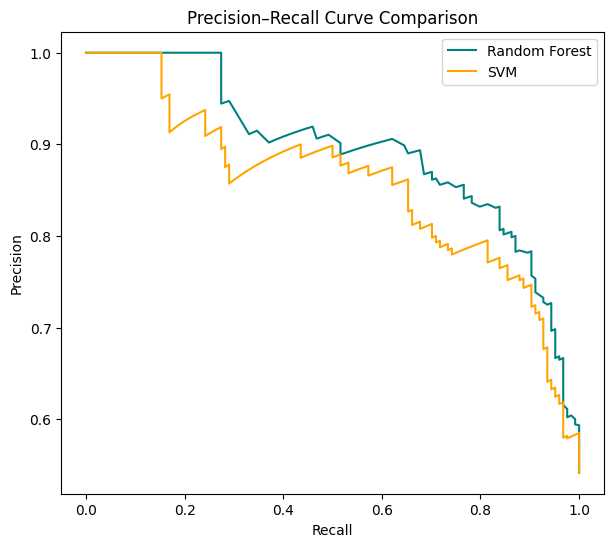

In [ ]:
# Compute Precision-Recall for Random Forest
prec_rf, rec_rf, _ = precision_recall_curve(y_test, y_prob_rf)
prec_svm, rec_svm, _ = precision_recall_curve(y_test, y_prob_svm)

# Plot both curves
plt.figure(figsize=(7,6))
plt.plot(rec_rf, prec_rf, label="Random Forest", color='teal')
plt.plot(rec_svm, prec_svm, label="SVM", color='orange')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve Comparison")
plt.legend()
plt.show()


5️⃣ Correlation Heatmap of All Features

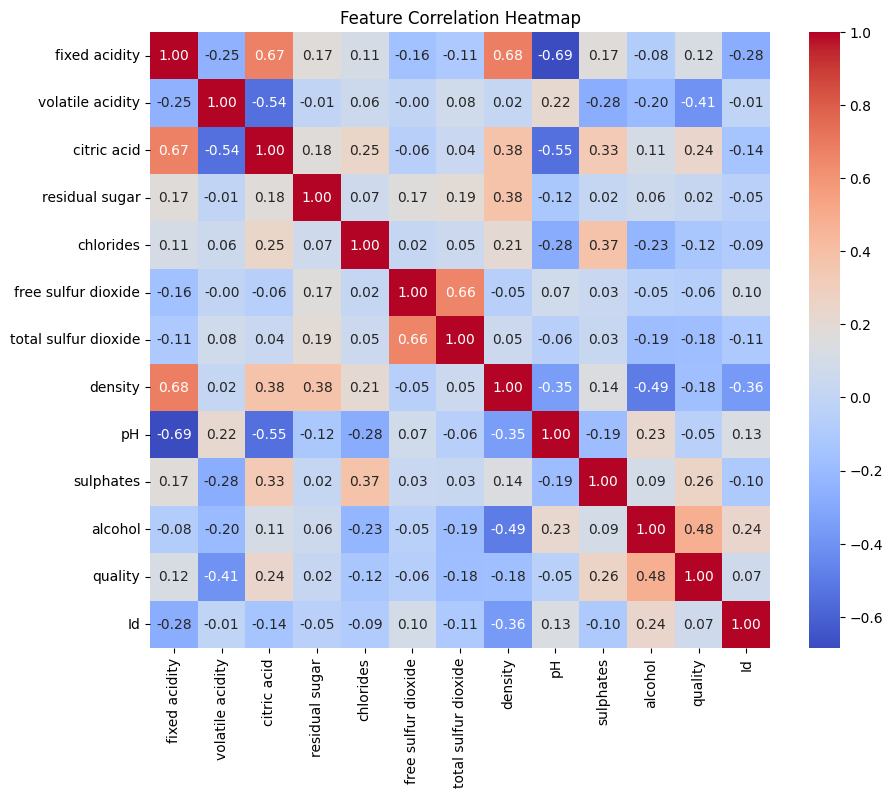

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


6️⃣ Pairplot (Relationships between Features)

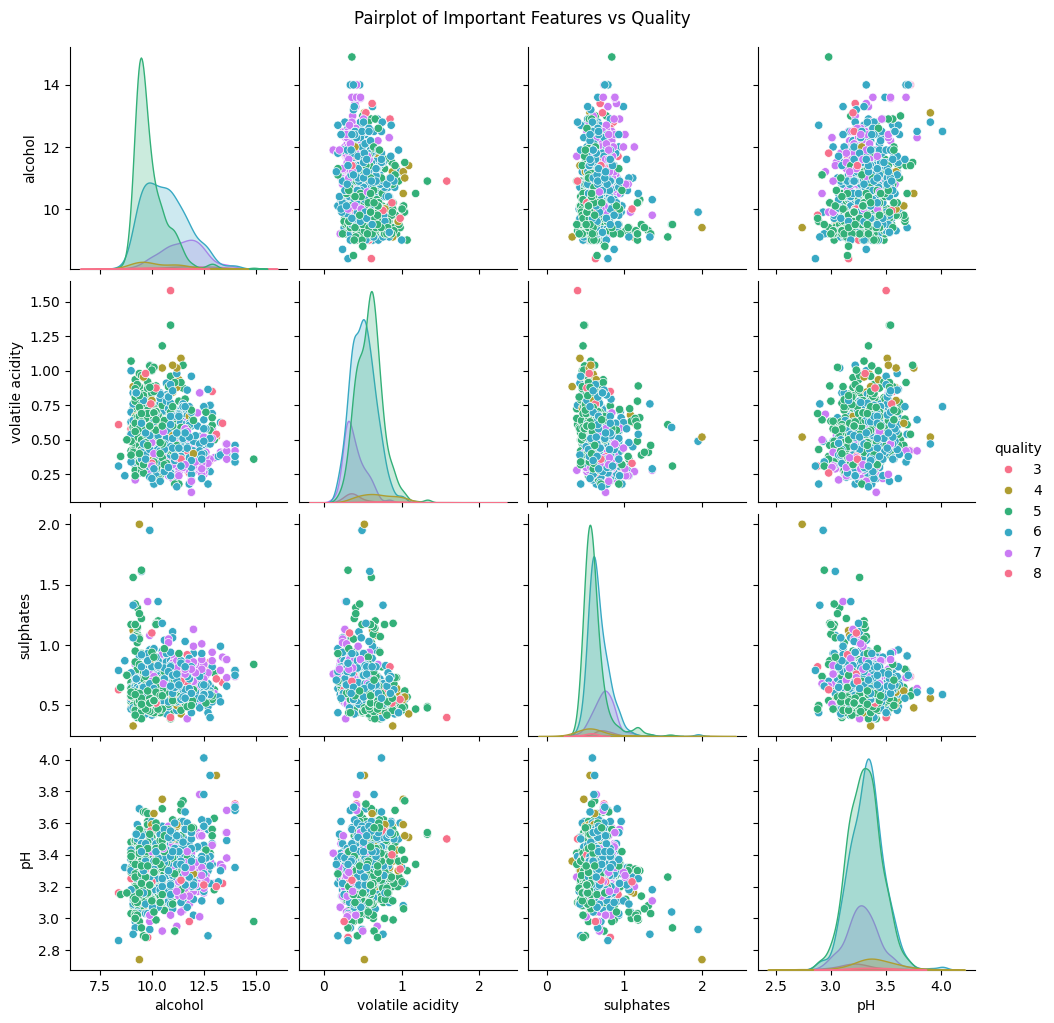

In [ ]:
# Visualize relationships between top features
sns.pairplot(df, vars=['alcohol', 'volatile acidity', 'sulphates', 'pH'], hue='quality', palette='husl')
plt.suptitle("Pairplot of Important Features vs Quality", y=1.02)
plt.show()


7️⃣ (Optional) Decision Boundary for SVM (2 Features Only)

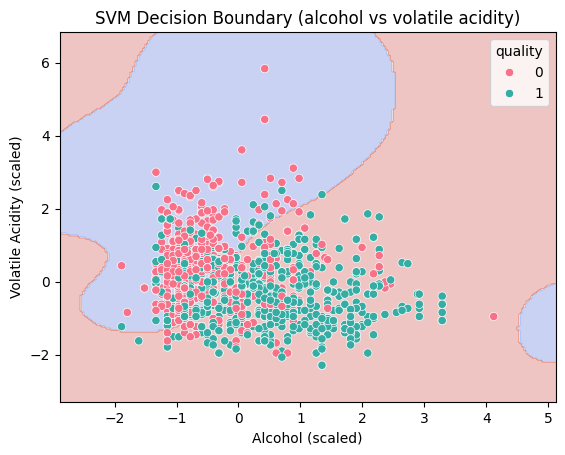

In [ ]:
# Example with 2 features for visualization
features = ['alcohol', 'volatile acidity']
X2 = df[features]
y2 = (df['quality'] >= 6).astype(int)

# Scale features
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# Train SVM on only these 2 features
svm2 = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm2.fit(X2_scaled, y2)

# Create a meshgrid to visualize decision boundary
x_min, x_max = X2_scaled[:,0].min() - 1, X2_scaled[:,0].max() + 1
y_min, y_max = X2_scaled[:,1].min() - 1, X2_scaled[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict class for each point in mesh
Z = svm2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
sns.scatterplot(x=X2_scaled[:,0], y=X2_scaled[:,1], hue=y2, palette='husl')
plt.title("SVM Decision Boundary (alcohol vs volatile acidity)")
plt.xlabel("Alcohol (scaled)")
plt.ylabel("Volatile Acidity (scaled)")
plt.show()
